# Ultrametric benchmark for continual learning - Artificial sequence - Data analysis
#### Simon Lebastard - 01/11/2020

First off let's go to the directory where the latest data was stored for artificial_8:

In [1]:
# Command to launch computation on random blocks sequences
# python3 main.py -v --dataset artificial --data_tree_depth 5 --data_seq_size 200 --seqlength 200000 --seqtype random_blocks2 --split_length 1000  --nbrtest 200 --nnarchi FCL --hidden_sizes 20 -T 0.4 0.4 0.4 0.4 0.4 0.4 --blocksz 1 100 200 500 1000 2000 4000 6000 8000 10000 20000

# Commadn to launch computation on ultrametric sequences
# python3 main.py -v --dataset artificial --data_tree_depth 5 --data_seq_size 200 --seqlength 200000 --seqtype ultrametric --nbrtest 200 --nnarchi FCL --hidden_sizes 20 -T 0.4 0.4 0.4 0.4 0.4 0.4 --blocksz 1 100 200 500 1000 2000 4000 6000 8000 10000 20000

In [2]:
%matplotlib inline

In [1]:
import os

project_root = '/home/proprietaire/Documents/Workspace/Jobs/Columbia/ultrametric_benchmark/Ultrametric-benchmark'

In [2]:
os.chdir(project_root)
import result_loader as ld

In [3]:
dataset = 'artificial_32'
nnarchi = 'FCL20'
seq_length = 300000
n_batches = 10
seq_genr_type = 'ultrametric'
lr=0.05

# Foar artificial ultrametric dataset only
linear_ratio_for_artificial_seq = 8
artificial_seq_len = 200

In [4]:
import ast

with open('Results/simu_mapping_compact.txt', 'r', encoding='utf-8') as filenames:
    filenames_dct_txt = filenames.read().replace('\n', '')
    
sim_directory = ast.literal_eval(filenames_dct_txt)

In this notebook, we'll loop through the files produced by the ultrametric framework accross temperatures and shuffle block size, and construct dictionnaries indexed by [T, blocksz].
We will then use those dicts to create the plots for DARPA.

Now let's load standard packages and find out about the content of each file:

In [5]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import pdb

import pickle

In [6]:
os.chdir(project_root+'/Results')

In [7]:
rs = ld.ResultSet_1toM(
    sim_map_dict = sim_directory,
    dataroot = project_root,
    sim_struct = '1toM',
    dataset_name = 'artificial_32',
    nn_config = 'FCL20',
    seq_type = 'ultrametric',
    simset_id = 0.4
)

rs.load_analytics()

## Uniform distr sequence ##

rs_unif = ld.ResultSet_1toM(
    sim_map_dict = sim_directory,
    dataroot = project_root,
    sim_struct = '1toM',
    dataset_name = 'artificial_32',
    nn_config = 'FCL20',
    seq_type = 'uniform',
    simset_id = 0.0
)
rs_unif.load_analytics(load_shuffle=False)

## Random split (random two-split) scenario - Various lengths ## 

rs_rb2 = {}

for hidden_sz in [20]:
    for block_sz in [1000]:
        rs_rb2[(hidden_sz, block_sz)] = ld.ResultSet_1toM(
            sim_map_dict = sim_directory,
            dataroot = project_root,
            sim_struct = '1toM',
            dataset_name = 'artificial_32',
            nn_config = 'FCL20',
            seq_type = 'random_blocks2',
            simset_id = 1000
        )
        rs_rb2[(hidden_sz, block_sz)].load_analytics()
    
## Random split (random two-split) scenario combining two frequencies - Various lengths ## 

# rs_rb2_2freq = {}

# for hidden_sz in [10, 20, 60]:
#     dataroot = project_root+'/Results/1toM/' + dataset + '/' + 'FCL'+str(hidden_sz) + '/' + 'random_blocks2_2freq_length200000_batches'+str(n_batches)
#     if 'artificial' in dataset:
#         dataroot += '_seqlen'+str(artificial_seq_len)+'_ratio'+str(linear_ratio_for_artificial_seq)
#     for block_sz_couple in [(100, 1000), (100, 10000), (1000, 10000)]:
#         rs_rb2_2freq[(hidden_sz, block_sz_couple[0], block_sz_couple[1])] = ld.ResultSet_1toM(
#             dataroot,
#             datapaths['1toM'][dataset]['FCL'+str(hidden_sz)]['random_blocks2_2freq'][(0.05, 8, 200000, block_sz_couple[0], block_sz_couple[1])]
#         )
#         rs_rb2_2freq[(hidden_sz, block_sz_couple[0], block_sz_couple[1])].load_analytics()


Loading analytics...
load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.

Loading analytics...
load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.

Loading analytics...
load_data set to False. Data sequences not loaded.
load_atc set to False. Autocorrelations not loaded.


In [8]:
os.chdir(project_root+"/plots")

## Labels history

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f4ceb8829b0>])

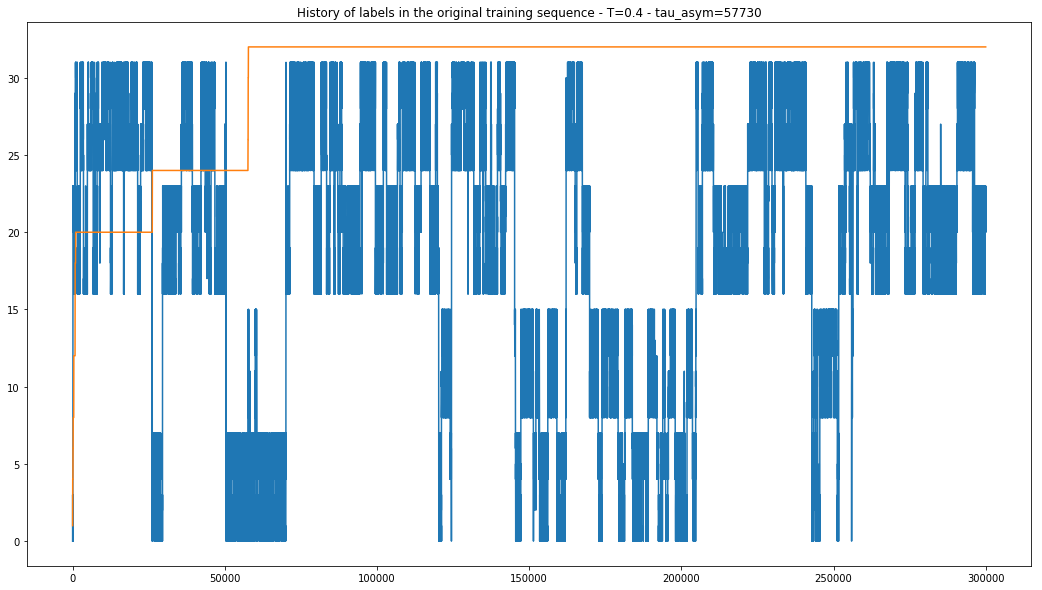

In [9]:
rs.lbl_history([0.4])

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f4ce414aa90>])

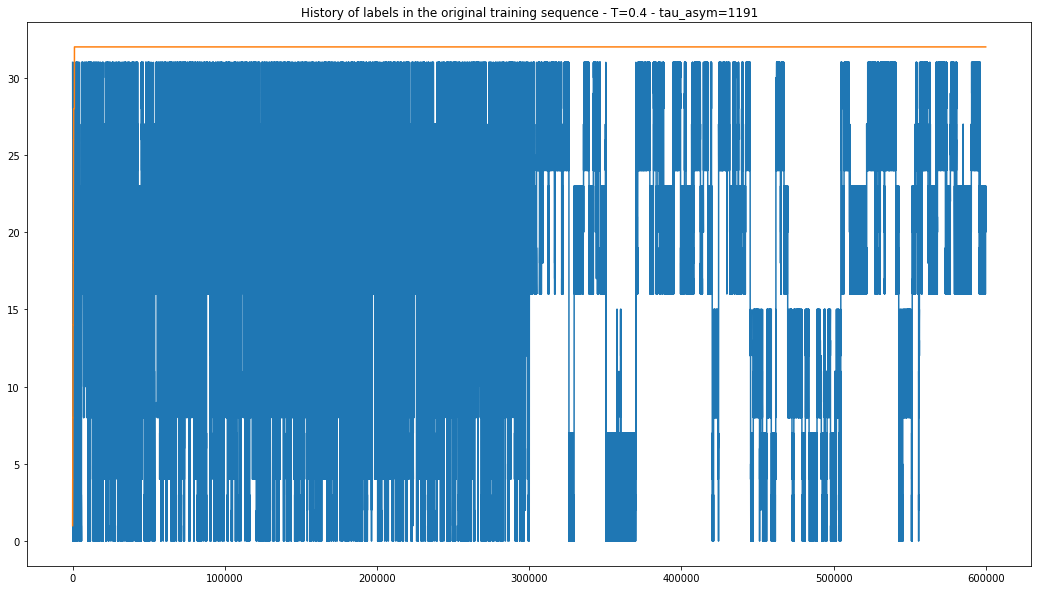

In [26]:
rs.lbl_history([0.4], shuffled_blocksz=100)

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f4ce410dd68>])

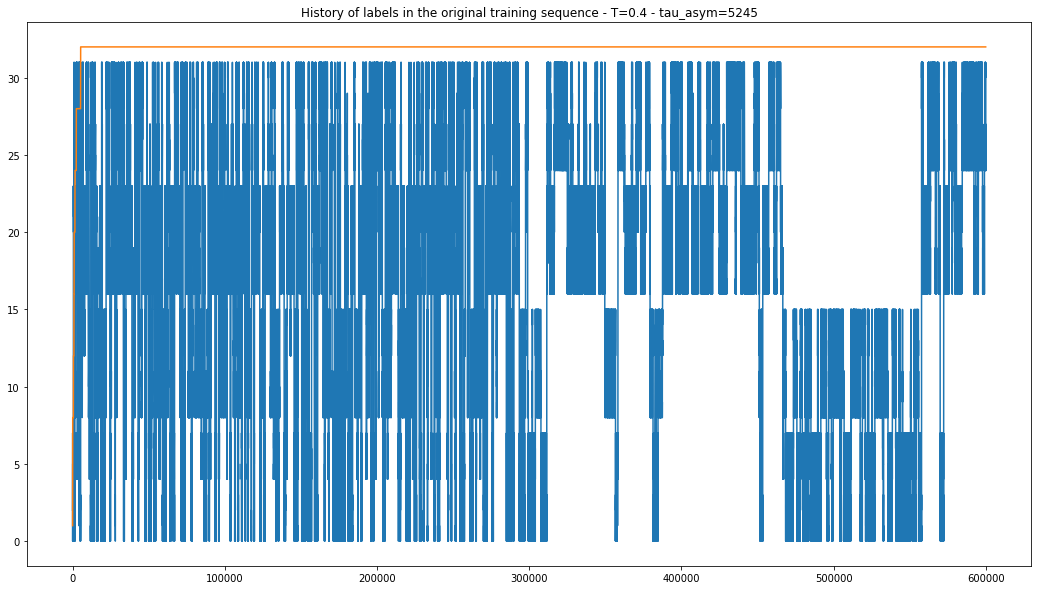

In [27]:
rs.lbl_history([0.4], shuffled_blocksz=500)

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f4ce41977f0>])

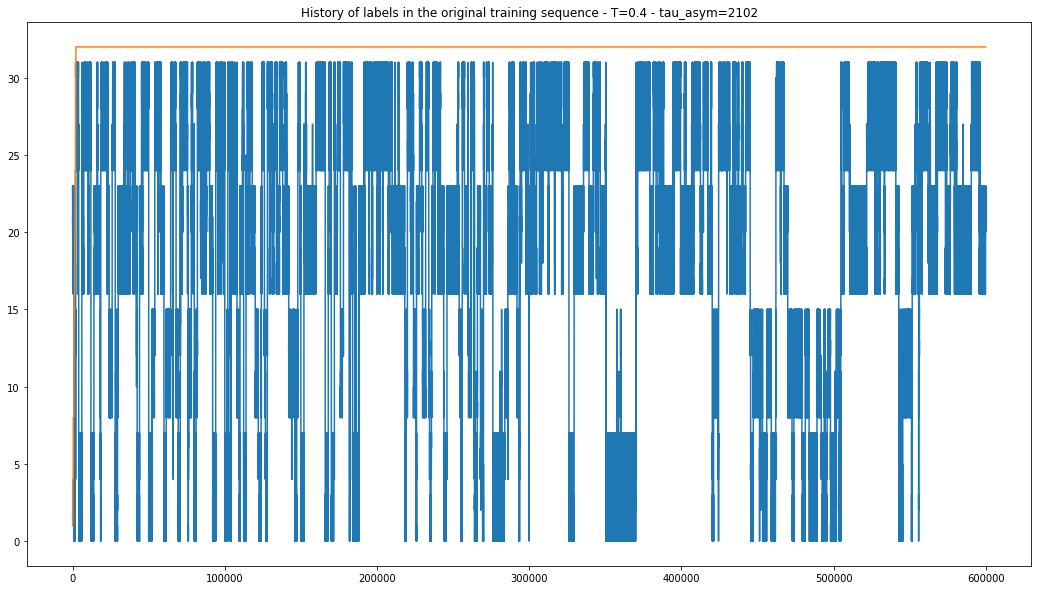

In [25]:
rs.lbl_history([0.4], shuffled_blocksz=2000)

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f4ce41e1240>])

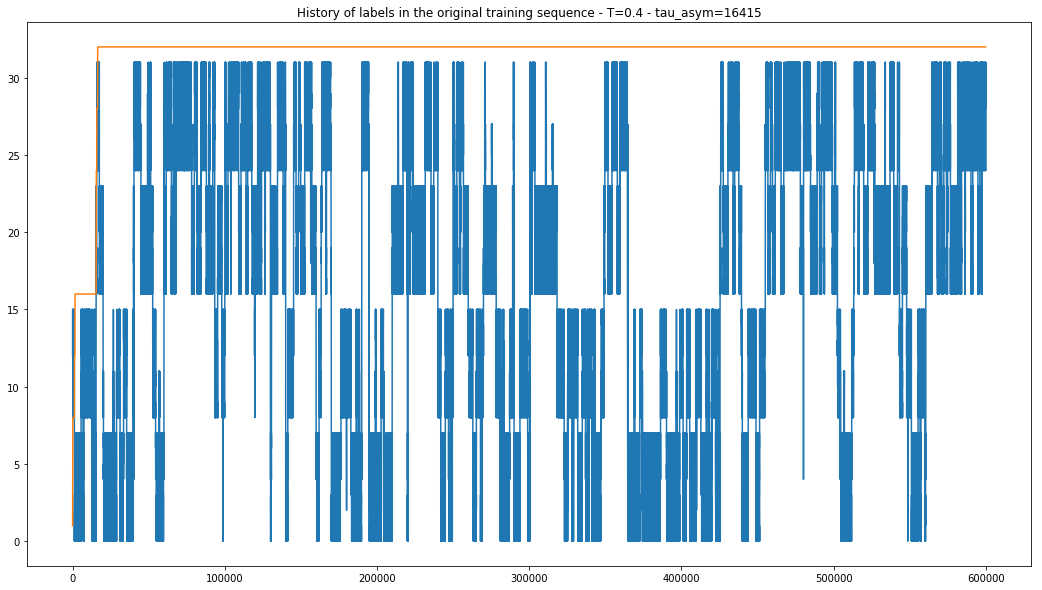

In [28]:
rs.lbl_history([0.4], shuffled_blocksz=10000)

In [ ]:
rs.lbl_history([0.5])

In [ ]:
rs_rb2[(20, 1000)].lbl_history([0.0], strides=[1000*k for k in range(200)])

In [ ]:
rs_rb2[(20, 1600)].lbl_history([0.0], strides=[1000*k for k in range(200)], shuffled_blocksz=1600)

In [ ]:
rs_rb2[(20, 1000)].lbl_history([0.0])

In [ ]:
rs_rb2[(20, 160)].lbl_history([0.0])

In [ ]:
rs_rb2[(20, 320)].lbl_history([0.0])

In [ ]:
rs_rb2[(20, 1000)].lbl_history([0.0])

In [ ]:
rs_rb2[(20, 2000)].lbl_history([0.0])

In [ ]:
rs_rb2[(20, 10000)].lbl_history([0.0])

## Accuracy = f(t) plots

In [ ]:
ld.get_acc_nomarkers(
    T_list = [0.4],
    acc_temp_orig = rs.var_acc_orig,
    acc_temp_shuffled = {
        0.4: {block_sz: rs.var_acc_shfl[0.4][block_sz] for block_sz in [1, 100, 200, 400, 800, 1600, 8000]}
    },
    acc_unif = [v for v in rs_unif.var_acc_orig.values()][0],
    acc_twofold_orig = rs_tfs_200k.var_acc_orig,
    acc_twofold_shuffled = {
        0.4: {block_sz: rs_tfs_200k.var_acc_shfl[block_sz] for block_sz in [1, 1000, 5000]}
    }
)

(<Figure size 1296x2592 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f4ce53b9a90>])

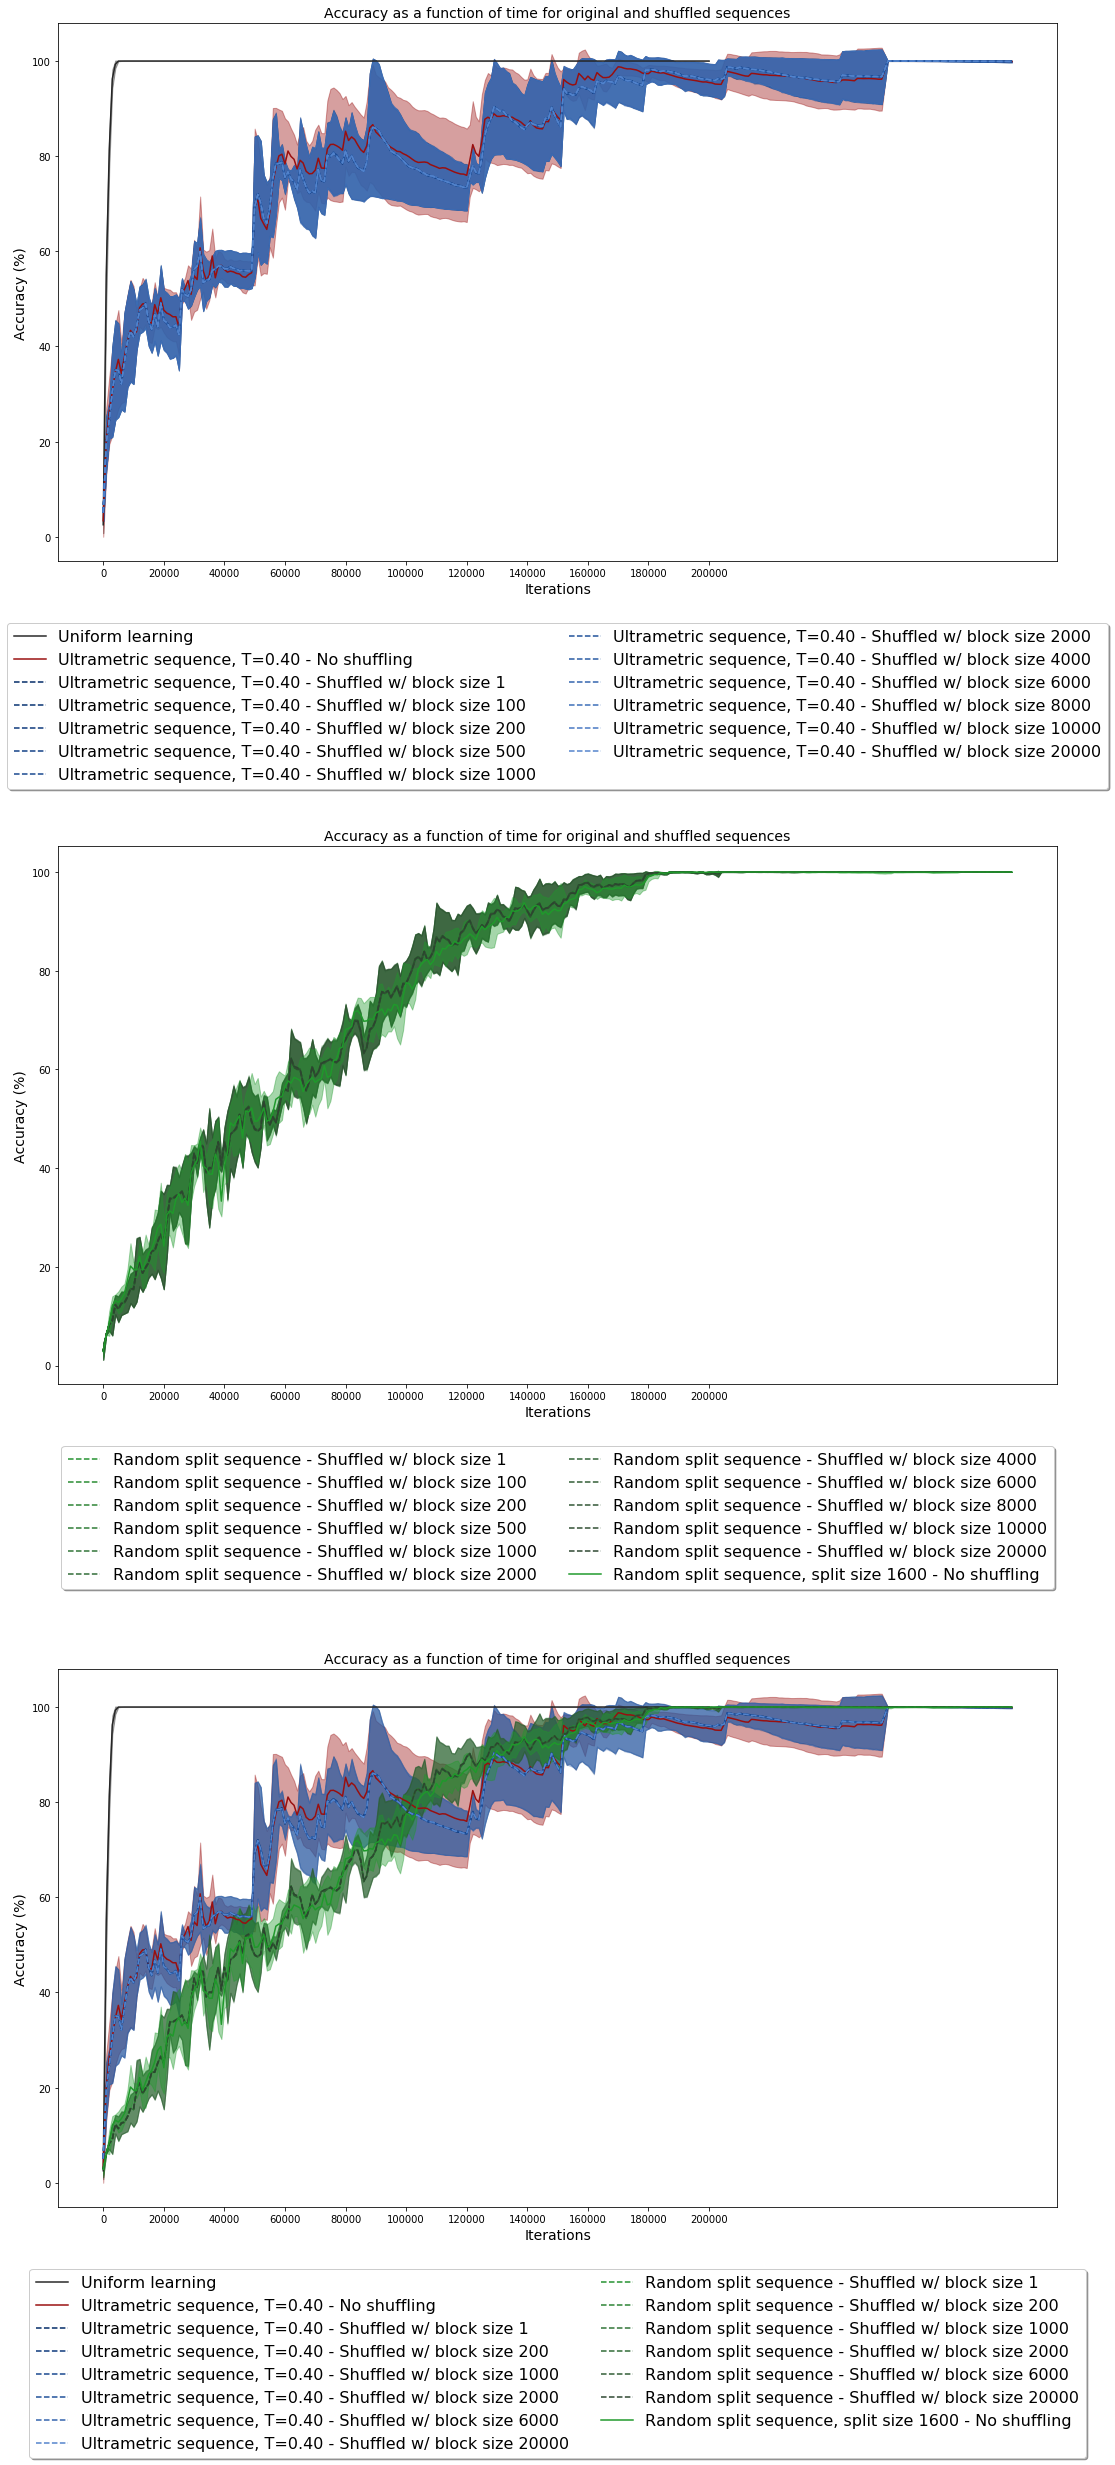

In [11]:
block_sizes = [1, 100, 200, 500, 1000, 2000, 4000, 6000, 8000, 10000, 20000]
block_sizes_commonviz = [1, 200, 1000, 2000, 6000, 20000]

ld.get_acc_nomarkers(
    T_list = [0.4],
    acc_temp_orig = rs.var_acc_orig,
    acc_temp_shuffled = {
        0.4: {block_sz: rs.var_acc_shfl[0.4][block_sz] for block_sz in block_sizes}
    },
    acc_unif = [v for v in rs_unif.var_acc_orig.values()][0],
    acc_twofold_orig = {0.4: rs_rb2[(20,1000)].var_acc_orig[0.0]},
    acc_twofold_shuffled = {
        0.4: {block_sz: rs_rb2[(20,1000)].var_acc_shfl[0.0][block_sz] for block_sz in block_sizes}
    },
    blocks_for_shared_plots = block_sizes_commonviz,
    var_scale = 1,
    save_format='svg'
)

In [33]:
len(rs.train_labels_shfl[0.4][500][0])

600000

In [23]:
rs.var_acc_shfl[0.4][100][0][:100]

array([[2.85416667e+00, 0.00000000e+00],
       [1.60729167e+01, 1.00000000e+03],
       [1.88020833e+01, 2.00000000e+03],
       [2.50000000e+01, 3.00000000e+03],
       [4.92812500e+01, 4.00000000e+03],
       [2.56250000e+01, 5.00000000e+03],
       [2.50000000e+01, 6.00000000e+03],
       [2.50000000e+01, 7.00000000e+03],
       [2.50000000e+01, 8.00000000e+03],
       [2.50000000e+01, 9.00000000e+03],
       [2.50000000e+01, 1.00000000e+04],
       [3.57187500e+01, 1.10000000e+04],
       [4.37500000e+01, 1.20000000e+04],
       [4.32708333e+01, 1.30000000e+04],
       [4.13020833e+01, 1.40000000e+04],
       [3.70208333e+01, 1.50000000e+04],
       [3.87395833e+01, 1.60000000e+04],
       [3.75104167e+01, 1.70000000e+04],
       [3.61458333e+01, 1.80000000e+04],
       [5.93958333e+01, 1.90000000e+04],
       [4.69375000e+01, 2.00000000e+04],
       [4.53958333e+01, 2.10000000e+04],
       [4.16145833e+01, 2.20000000e+04],
       [4.21875000e+01, 2.30000000e+04],
       [4.357291

In [ ]:
ld.get_acc_nomarkers(
    T_list = [0.4],
    acc_temp_orig = rs.var_acc_orig,
    acc_temp_shuffled = {
        0.4: {block_sz: rs.var_acc_shfl[0.4][block_sz] for block_sz in [1, 100, 200, 400, 800, 1600, 8000]}
    },
    acc_unif = [v for v in rs_unif.var_acc_orig.values()][0],
    acc_twofold_orig = {0.4: rs_rb2[(20,2000)].var_acc_orig[0.0]},
    acc_twofold_shuffled = {
        0.4: {block_sz: rs_rb2[(20,2000)].var_acc_shfl[0.0][block_sz] for block_sz in [1]}
    },
    blocks_for_shared_plots = [1],
    var_scale = 0.3,
    save_format='svg'
)

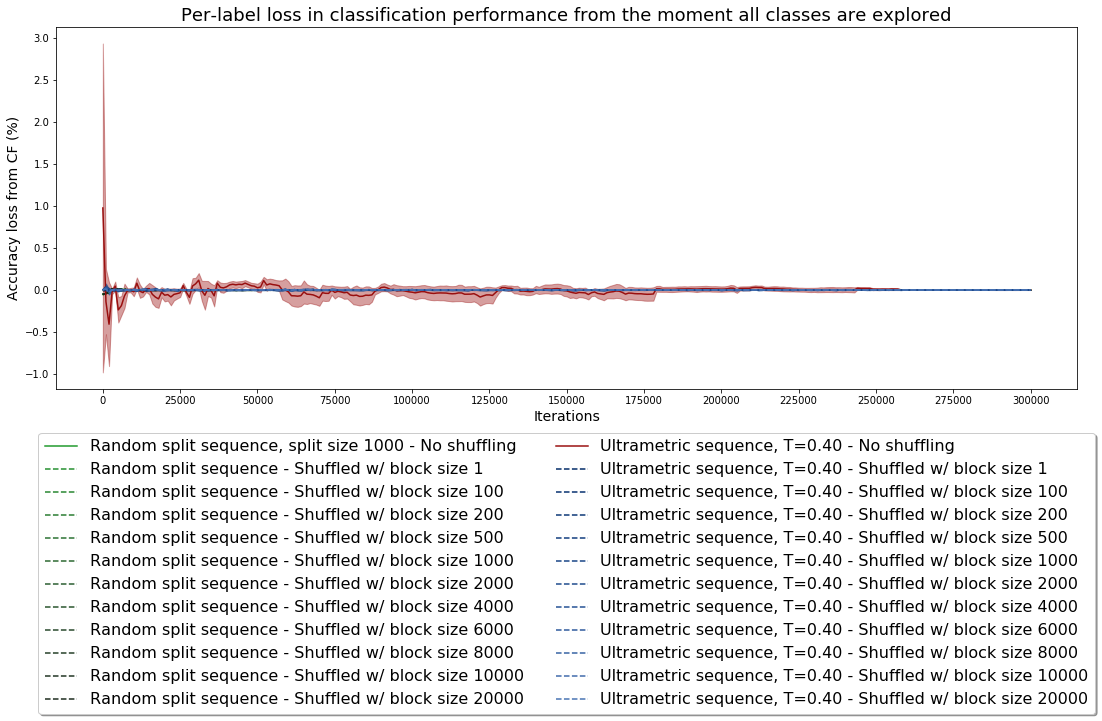

In [12]:
hidden_sz = 20
n_tests = 300
seq_length = 300000

#splt_sizes_orig = {
#    0.4: (1, 100, 200, 400, 800, 1600, 8000)
#}

splt_sizes_orig = {
    0.4: (1, 100, 200, 500, 1000, 2000, 4000, 6000, 8000, 10000, 20000)
}

#splt_sizes_rb = {
#    0.4: (1600, (1, 100, 200, 400, 800, 1600, 8000))
#}

splt_sizes_rb = {
    0.4: (1000, (1, 100, 200, 500, 1000, 2000, 4000, 6000, 8000, 10000, 20000))
}

from matplotlib.colors import hsv_to_rgb
hsv_unif = (0, 0, 0.15)
hsv_orig = (0, 0.9, 0.6)
hsv_tfs_orig = (0.35, 0.8, 0.6)
markers = ['o','+','x','4','s','p','P', '8', 'h', 'X']
var_scale = 0.5

cf_randsplit = {}
cf_randsplit_std = {}
t_explr_randsplit = {}
cf_ultra = {}
cf_ultra_std = {}
t_explr_ultra = {}

avg_cf_randsplit = {}
avg_cf_randsplit_std = {}
avg_cf_ultra = {}
avg_cf_ultra_std = {}
init_cf_randsplit = {}
init_cf_randsplit_std = {}
init_cf_ultra = {}
init_cf_ultra_std = {}

xtick_scale = 25
xtick_pos = xtick_scale*np.arange((n_tests//xtick_scale)+1)
xtick_labels = int(seq_length/((n_tests//xtick_scale)))*np.arange((n_tests//xtick_scale)+1)

fig = plt.figure(figsize=(18,len(splt_sizes_rb.keys())*12))

for splt_id, (T, splt_info) in enumerate(splt_sizes_rb.items()):
    splt_sz = splt_info[0]
    block_sizes = splt_info[1]
    cf_ax = plt.subplot(len(splt_sizes_rb.keys()),1,1+splt_id)
    
    for seq_id, seq in enumerate(rs_rb2[(hidden_sz,splt_sz)].train_labels_orig[0.0]):
        t_explr_randsplit_orig = []
        cf_randsplit_orig = []
        _cf, _t_explr = ld.get_cf(
            seq,
            rs_rb2[(hidden_sz,splt_sz)].var_acc_orig[0.0][seq_id][:,0],
            rs_rb2[(hidden_sz,splt_sz)].var_acc_shfl[0.0][1][seq_id][:,0]
        )
        if _t_explr:
            cf_aligned = np.concatenate([
                np.array(_cf[_t_explr:]),
                np.zeros(_t_explr)
            ])
            cf_randsplit_orig.append(cf_aligned)
            t_explr_randsplit_orig.append(_t_explr)

    if len(cf_randsplit_orig) > 0:
        cf_randsplit_orig_mean = np.mean(
            np.stack(cf_randsplit_orig, axis=1),
            axis=1
        )
        cf_randsplit_orig_std = np.std(
            np.stack(cf_randsplit_orig, axis=1),
            axis=1
        )
        cf_ax.plot(
            cf_randsplit_orig_mean,
            color = hsv_to_rgb(hsv_tfs_orig),
            ls = 'solid',
            label = 'Random split sequence, split size {0:d} - No shuffling'.format(splt_sz)
        )
        cf_ax.fill_between(
            x = range(len(cf_randsplit_orig_mean)),
            y1 = cf_randsplit_orig_mean - var_scale*cf_randsplit_orig_std,
            y2 = cf_randsplit_orig_mean + var_scale*cf_randsplit_orig_std,
            color = hsv_to_rgb(hsv_tfs_orig),
            alpha = 0.4
        )
        avg_cf_randsplit[0] = np.mean(cf_randsplit_orig_mean)
        avg_cf_randsplit_std[0] = np.mean(cf_randsplit_orig_std)
        init_cf_randsplit[0] = cf_randsplit_orig_mean[0]
        init_cf_randsplit[0] = cf_randsplit_orig_std[0]
    
    for block_id, block_sz in enumerate(block_sizes):
        hsv_tfs_shfl = tuple([0.35, 0.8-(block_id+1)*0.04, 0.6-(block_id+1)*0.04])
        t_explr_randsplit[block_sz] = []
        cf_randsplit[block_sz] = []
        for seq_id, seq in enumerate(rs_rb2[(hidden_sz,splt_sz)].train_labels_shfl[0.0][block_sz]):
            _cf, _t_explr = ld.get_cf(
                seq,
                rs_rb2[(hidden_sz,splt_sz)].var_acc_shfl[0.0][block_sz][seq_id][:,0],
                rs_rb2[(hidden_sz,splt_sz)].var_acc_shfl[0.0][1][seq_id][:,0]
            )
            if _t_explr:
                cf_aligned = np.concatenate([
                    np.array(_cf[_t_explr:]),
                    np.zeros(_t_explr)
                ])
                cf_randsplit[block_sz].append(cf_aligned)
                t_explr_randsplit[block_sz].append(_t_explr)

        if len(cf_randsplit[block_sz]) > 0:
            cf_randsplit_mean = np.mean(
                np.stack(cf_randsplit[block_sz], axis=1),
                axis=1
            )
            cf_randsplit_std = np.std(
                np.stack(cf_randsplit[block_sz], axis=1),
                axis=1
            )
            cf_ax.plot(
                cf_randsplit_orig_mean,
                color = hsv_to_rgb(hsv_tfs_shfl),
                ls = '--',
                label = 'Random split sequence - Shuffled w/ block size {0:d}'.format(block_sz)
            )
            cf_ax.fill_between(
                x = range(len(cf_randsplit_mean)),
                y1 = cf_randsplit_mean - var_scale*cf_randsplit_std,
                y2 = cf_randsplit_mean + var_scale*cf_randsplit_std,
                color = hsv_to_rgb(hsv_tfs_shfl),
                alpha = 0.4
            )
            avg_cf_randsplit[block_sz] = np.mean(cf_randsplit_mean)
            avg_cf_randsplit_std[block_sz] = np.mean(cf_randsplit_std)
            init_cf_randsplit[block_sz] = cf_randsplit_mean[0]
            init_cf_randsplit_std[block_sz] = cf_randsplit_std[0]

    t_explr_ultra_orig = []
    cf_ultra_orig = []
    for seq_id, seq in enumerate(rs.train_labels_orig[T]):
        _cf, _t_explr = ld.get_cf(
            seq,
            rs.var_acc_orig[T][seq_id][:,0],
            rs.var_acc_shfl[T][1][seq_id][:,0]
        )
        if _t_explr:
            cf_aligned = np.concatenate([
                np.array(_cf[_t_explr:]),
                np.zeros(_t_explr)
            ])
            cf_ultra_orig.append(cf_aligned)
            t_explr_ultra_orig.append(_t_explr)
        cf_ultra_orig.append(_cf)
        t_explr_ultra_orig.append(_t_explr)
    if len(cf_ultra_orig) > 0:
        cf_ultra_orig_mean = np.mean(
            np.stack(cf_ultra_orig, axis=1),
            axis=1
        )
        cf_ultra_orig_std = np.std(
            np.stack(cf_ultra_orig, axis=1),
            axis=1
        )
        cf_ax.plot(
            cf_ultra_orig_mean,
            color = hsv_to_rgb(hsv_orig),
            ls = 'solid',
            label = 'Ultrametric sequence, T={0:.2f} - No shuffling'.format(T)
        )
        cf_ax.fill_between(
            x = range(len(cf_ultra_orig_mean)),
            y1 = cf_ultra_orig_mean - var_scale*cf_ultra_orig_std,
            y2 = cf_ultra_orig_mean + var_scale*cf_ultra_orig_std,
            color = hsv_to_rgb(hsv_orig),
            alpha = 0.4
        )
        avg_cf_ultra[0] = np.mean(cf_ultra_orig_mean)
        avg_cf_ultra_std[0] = np.mean(cf_ultra_orig_std)
        init_cf_ultra[0] = cf_ultra_orig_mean[0]
        init_cf_ultra_std[0] = cf_ultra_orig_std[0]
    
    for block_id, block_sz in enumerate(block_sizes):
        hsv_shfl = tuple([0.6, 1-block_id*0.04, 0.4+block_id*0.03])
        t_explr_ultra[block_sz] = []
        cf_ultra[block_sz] = []
        for seq_id, seq in enumerate(rs.train_labels_shfl[T][block_sz]):
            _cf, _t_explr = ld.get_cf(
                seq,
                rs.var_acc_shfl[T][block_sz][seq_id][:,0],
                rs.var_acc_shfl[T][1][seq_id][:,0]
            )
            if _t_explr:
                cf_aligned = np.concatenate([
                    np.array(_cf[_t_explr:]),
                    np.zeros(_t_explr)
                ])
                cf_ultra[block_sz].append(cf_aligned)
                t_explr_ultra[block_sz].append(_t_explr)
            cf_ultra[block_sz].append(_cf)
            t_explr_ultra[block_sz].append(_t_explr)
        if len(cf_ultra[block_sz]) > 0:
            cf_ultra_mean = np.mean(
                np.stack(cf_ultra[block_sz], axis=1),
                axis=1
            )
            cf_ultra_std = np.std(
                np.stack(cf_ultra[block_sz], axis=1),
                axis=1
            )
            cf_ax.plot(
                cf_ultra_mean,
                color = hsv_to_rgb(hsv_shfl),
                ls = '--',
                label = 'Ultrametric sequence, T={0:.2f} - Shuffled w/ block size {1:d}'.format(T, block_sz)
            )
            cf_ax.fill_between(
                x = range(len(cf_ultra_mean)),
                y1 = cf_ultra_mean - var_scale*cf_ultra_std,
                y2 = cf_ultra_mean + var_scale*cf_ultra_std,
                color = hsv_to_rgb(hsv_shfl),
                alpha = 0.4
            )
            avg_cf_ultra[block_sz] = np.mean(cf_ultra_mean)
            avg_cf_ultra_std[block_sz] = np.mean(cf_ultra_std)
            init_cf_ultra[block_sz] = cf_ultra_mean[0]
            init_cf_ultra_std[block_sz] = cf_ultra_std[0]

    plt.xticks(xtick_pos, xtick_labels)
    plt.title('Per-label loss in classification performance from the moment all classes are explored', fontsize = 18)
            
    box = cf_ax.get_position()
    cf_ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

    cf_ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2, prop={'size': 16})

    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Accuracy loss from CF (%)', fontsize=14)

fig.tight_layout(pad=10.0)
plt.savefig('out_plots_cfscore.svg', format='svg')
plt.savefig('out_plots_cfscore.pdf', format='pdf')

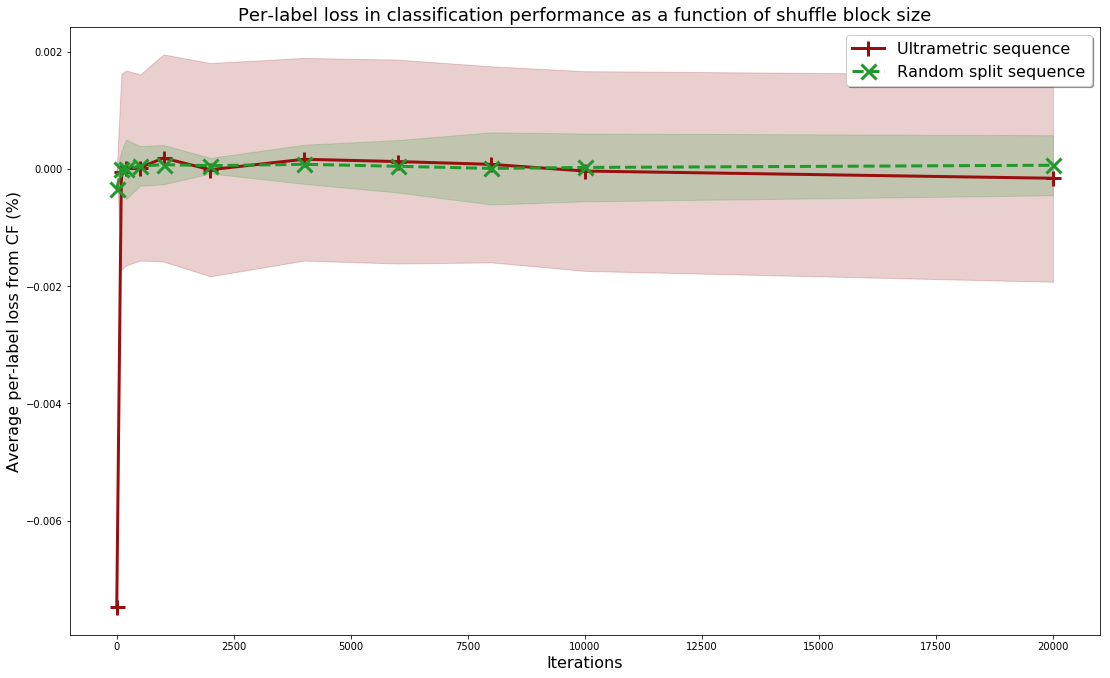

In [13]:
fig = plt.figure(figsize=(18,len(splt_sizes_rb.keys())*12))
cf_blsz_ax = plt.subplot(111)

cf_blsz_ax.plot(
    [k for k in sorted(avg_cf_ultra.keys()) if k>0],
    [avg_cf_ultra[k] for k in sorted(avg_cf_ultra.keys()) if k!=1],
    ls = 'solid',
    linewidth=3,
    marker = '+',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_orig),
    label = 'Ultrametric sequence'
)
cf_blsz_ax.fill_between(
    x = [k for k in sorted(avg_cf_ultra.keys()) if k>0],
    y1 = [avg_cf_ultra[k] - var_scale*avg_cf_ultra_std[k] for k in sorted(avg_cf_ultra.keys()) if k>0],
    y2 = [avg_cf_ultra[k] + var_scale*avg_cf_ultra_std[k] for k in sorted(avg_cf_ultra.keys()) if k>0],
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.2
)

cf_blsz_ax.plot(
    [k for k in sorted(avg_cf_randsplit.keys()) if k>0],
    [avg_cf_randsplit[k] for k in sorted(avg_cf_randsplit.keys()) if k!=1],
    ls = '--',
    linewidth=3,
    marker = 'x',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_tfs_orig),
    label = 'Random split sequence'
)

cf_blsz_ax.fill_between(
    x = [k for k in sorted(avg_cf_randsplit.keys()) if k>0],
    y1 = [avg_cf_randsplit[k] - var_scale*avg_cf_randsplit_std[k] for k in sorted(avg_cf_randsplit.keys()) if k>0],
    y2 = [avg_cf_randsplit[k] + var_scale*avg_cf_randsplit_std[k] for k in sorted(avg_cf_randsplit.keys()) if k>0],
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.2
)

plt.title('Per-label loss in classification performance as a function of shuffle block size', fontsize = 18)

cf_blsz_ax.legend(fancybox=True, shadow=True, prop={'size': 16})

plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Average per-label loss from CF (%)', fontsize=16)

fig.tight_layout(pad=10.0)
plt.savefig('out_plots_cfscore_avg.svg', format='svg')
plt.savefig('out_plots_cfscore_avg.pdf', format='pdf')

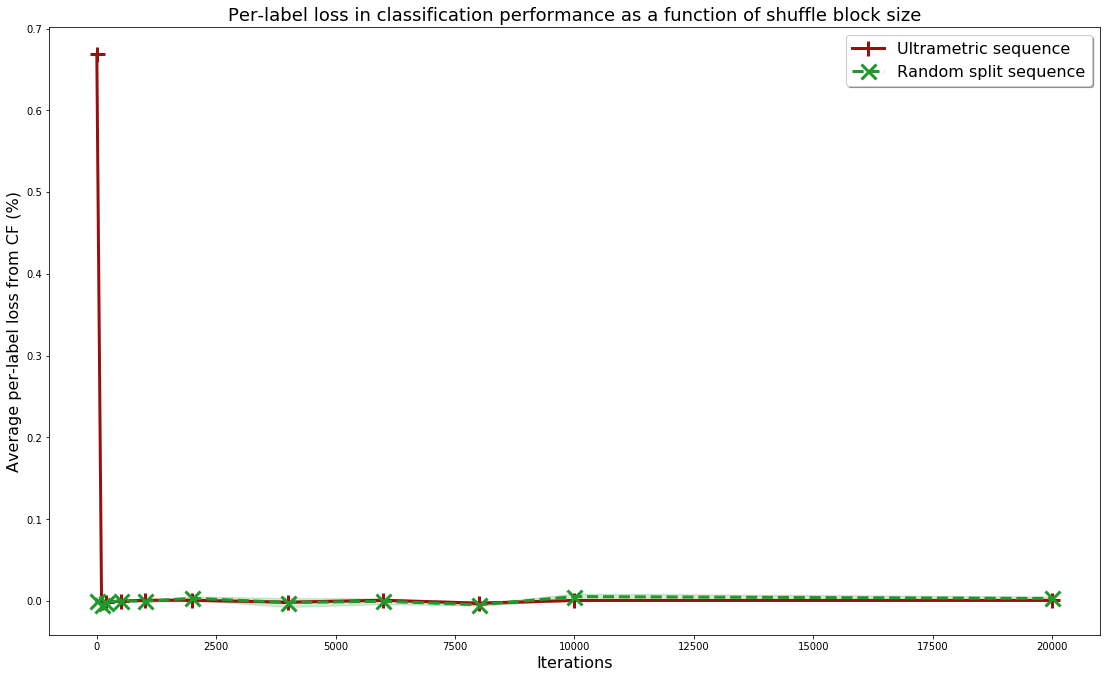

In [15]:
fig = plt.figure(figsize=(18,len(splt_sizes_rb.keys())*12))
cf_blsz_ax = plt.subplot(111)

plt.plot(
    [k for k in sorted(init_cf_ultra.keys()) if k>0],
    [init_cf_ultra[k] for k in sorted(init_cf_ultra.keys()) if k!=1],
    ls = 'solid',
    linewidth=3,
    marker = '+',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_orig),
    label = 'Ultrametric sequence'
)
cf_blsz_ax.fill_between(
    x = [k for k in sorted(avg_cf_ultra.keys()) if k>0],
    y1 = [init_cf_ultra[k] - var_scale*init_cf_ultra_std[k] for k in sorted(init_cf_ultra.keys()) if k>0],
    y2 = [init_cf_ultra[k] + var_scale*init_cf_ultra_std[k] for k in sorted(init_cf_ultra.keys()) if k>0],
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.2
)

plt.plot(
    [k for k in sorted(init_cf_randsplit.keys()) if k>0],
    [init_cf_randsplit[k] for k in sorted(init_cf_randsplit.keys()) if k!=1],
    ls = '--',
    linewidth=3,
    marker = 'x',
    markersize = 15,
    markeredgewidth = 3,
    color = hsv_to_rgb(hsv_tfs_orig),
    label = 'Random split sequence'
)
cf_blsz_ax.fill_between(
    x = [k for k in sorted(avg_cf_randsplit.keys()) if k>0],
    y1 = [init_cf_randsplit[k] - var_scale*init_cf_randsplit_std[k] for k in sorted(init_cf_randsplit.keys()) if k>0],
    y2 = [init_cf_randsplit[k] + var_scale*init_cf_randsplit_std[k] for k in sorted(init_cf_randsplit.keys()) if k>0],
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.2
)

plt.title('Per-label loss in classification performance as a function of shuffle block size', fontsize = 18)

cf_blsz_ax.legend(fancybox=True, shadow=True, prop={'size': 16})

plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Average per-label loss from CF (%)', fontsize=16)

fig.tight_layout(pad=10.0)
plt.savefig('out_plots_cfscore_init.svg', format='svg')
plt.savefig('out_plots_cfscore_init.pdf', format='pdf')

In [ ]:
ld.get_cf(
    rs_rb2[(hidden_sz,block_sz)].train_labels_orig[0.0][0],
    rs_rb2[(hidden_sz,block_sz)].var_acc_orig[0.0][0][:,0],
    rs_rb2[(hidden_sz,block_sz)].var_acc_shfl[0.0][1][0][:,0]
)

In [ ]:
rs_rb2[(hidden_sz,block_sz)].var_acc_shfl[0.0][1][0][:,0]

In [ ]:
ld.get_acc(
    T_list = [0.5],
    acc_temp_orig = rs.var_acc_orig,
    acc_temp_shuffled = {
        0.5: {block_sz: rs.var_acc_shfl[0.5][block_sz] for block_sz in [1, 20, 32, 80, 160, 320, 1600]}
    },
    acc_unif = [v for v in rs_unif.var_acc_orig.values()][0],
    acc_twofold_orig = {0.5: rs_rb2[(20, 160)].var_acc_orig[0.0]},
    acc_twofold_shuffled = {
        0.5: {block_sz: rs_rb2[(20, 160)].var_acc_shfl[0.0][block_sz] for block_sz in [1, 20, 32, 80, 160, 320, 1600]}
    },
    blocks_for_shared_plots = [1, 32, 80, 160],
    var_scale = 0.2
)

In [ ]:
pdb.runcall(ld.get_acc,
            T_list = [0.5],
            acc_temp_orig = rs.var_acc_orig,
            acc_temp_shuffled = {
                0.5: {block_sz: rs.var_acc_shfl[0.5][block_sz] for block_sz in [1, 20, 64, 160, 1600, 8000]}
            },
            acc_unif = [v for v in rs_unif.var_acc_orig.values()][0],
            acc_twofold_orig = {0.5: rs_rb2[(20, 320)].var_acc_orig[0.0]},
            acc_twofold_shuffled = {
                0.5: {block_sz: rs_rb2[(20, 320)].var_acc_shfl[0.0][block_sz] for block_sz in [1, 20, 64, 160, 1600, 8000]}
            }
)

In [ ]:
rs_rb2[(20,1000)].var_acc_orig[0.0]

In [ ]:
ld.get_acc(
    T_list = [0.0],
    acc_temp_orig = rs_rb2[100].var_acc_orig,
    acc_temp_shuffled = {
        0.0: {block_sz: rs_rb2[100].var_acc_shfl[0.0][block_sz] for block_sz in [1]}
    }
)

In [ ]:
ld.get_acc(
    T_list = [0.0],
    acc_temp_orig = rs_rb2[1000].var_acc_orig,
    acc_temp_shuffled = {
        0.0: {block_sz: rs_rb2[1000].var_acc_shfl[0.0][block_sz] for block_sz in [1]}
    }
)

In [ ]:
ld.get_acc(
    T_list = [0.0],
    acc_temp_orig = rs_rb2[10000].var_acc_orig,
    acc_temp_shuffled = {
        0.0: {block_sz: rs_rb2[10000].var_acc_shfl[0.0][block_sz] for block_sz in [1]}
    }
)

In [ ]:
cf_unit = {}
cf = {}
cf_explr = {}

for hidden_sz in [5, 10, 20, 60, 200]:
    for block_sz in [10, 100, 1000, 4000, 8000, 10000]:
        cf_unit[(hidden_sz,block_sz)] = []
        n_seq = len(rs_rb2[(hidden_sz, block_sz)].var_acc_orig[0.0])
        cf_at_fullexplr = []
        for seq_id in range(n_seq):
            _cf, _t_explr = ld.get_cf(
                    rs_rb2[(hidden_sz,block_sz)].train_labels_orig[0.0][seq_id],
                    rs_rb2[(hidden_sz,block_sz)].var_acc_orig[0.0][seq_id][:,0],
                    rs_rb2[(hidden_sz,block_sz)].var_acc_shfl[0.0][1][0][:,0]
                )
            cf_unit[(hidden_sz,block_sz)].append(_cf)
            cf_at_fullexplr.append(_cf[_t_explr])
        cf_unit[(hidden_sz,block_sz)] = np.stack(cf_unit[(hidden_sz,block_sz)], axis=1)
        cf[(hidden_sz,block_sz)] = np.mean(cf_unit[(hidden_sz,block_sz)], axis=1)
        cf_explr[(hidden_sz,block_sz)] = np.mean(np.array(cf_at_fullexplr))
    
    if hidden_sz in [10, 20, 60]:
        for block_sz_couple in [(100, 1000), (100, 10000), (1000, 10000)]:
            cf_unit[(hidden_sz, block_sz_couple[0], block_sz_couple[1])] = []
            n_seq = len(rs_rb2_2freq[(hidden_sz, block_sz_couple[0], block_sz_couple[1])].var_acc_orig[0.0])
            for seq_id in range(n_seq):
                cf_unit[(hidden_sz, block_sz_couple[0], block_sz_couple[1])].append(
                    ld.get_cf(
                        rs_rb2_2freq[(hidden_sz, block_sz_couple[0], block_sz_couple[1])].train_labels_orig[0.0][seq_id],
                        rs_rb2_2freq[(hidden_sz, block_sz_couple[0], block_sz_couple[1])].var_acc_orig[0.0][seq_id][:,0],
                        rs_rb2_2freq[(hidden_sz, block_sz_couple[0], block_sz_couple[1])].var_acc_shfl[0.0][1][0][:,0]
                    )
                )
            cf_unit[(hidden_sz, block_sz_couple[0], block_sz_couple[1])] = np.stack(cf_unit[(hidden_sz, block_sz_couple[0], block_sz_couple[1])], axis=1)
            cf[(hidden_sz, block_sz_couple[0], block_sz_couple[1])] = np.mean(cf_unit[(hidden_sz, block_sz_couple[0], block_sz_couple[1])], axis=1)

In [ ]:
fig = plt.figure(figsize=(15,10))
cf_ax = plt.subplot(111)
for block_sz in [10, 100, 1000, 10000]:
    cf_ax.plot(
        cf[(20, block_sz)],
        label='Forgetting score - Split size {0:d}'.format(block_sz)
    )
cf_ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15),
					  fancybox=True, shadow=True, ncol=2,
					  prop={'size': 16})
plt.title("Catastrophic forgetting on split sequences as a function of split sequence length", fontsize = 14)
plt.xlabel('CF score', fontsize=14)
plt.ylabel('Iterations', fontsize=14)

In [ ]:
fig = plt.figure(figsize=(15,10))
cf_ax = plt.subplot(111)

for block_sz in [1000, 10000]:
    cf_ax.plot(
        cf[(20, block_sz)],
        label='Forgetting score - Split size {0:d}'.format(block_sz)
    )

for block_sz_couple in [(1000, 10000)]:
    cf_ax.plot(
        cf[(20, block_sz_couple[0], block_sz_couple[1])],
        label='Forgetting score - Split size {0:d} x {1:d}'.format(block_sz_couple[0], block_sz_couple[1])
    )

cf_ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15),
					  fancybox=True, shadow=True, ncol=2,
					  prop={'size': 16})
plt.title("Catastrophic forgetting on split sequences as a function of split sequence length", fontsize = 14)
plt.ylabel('CF score', fontsize=14)
plt.xlabel('Iterations', fontsize=14)

n_tests=200
seq_length=200000
xtick_scale = 25
xtick_pos = xtick_scale*np.arange((n_tests//xtick_scale)+1)
xtick_labels = int(seq_length/((n_tests//xtick_scale)))*np.arange((n_tests//xtick_scale)+1)
plt.xticks(xtick_pos, xtick_labels)

Next let's try to obtain a plot of mean CF score as a function of (hidden_sz, block_sz) for single-frequency signals:

In [ ]:
fig = plt.figure(figsize=(15,12))
cf_ax = plt.axes(projection='3d')

hidden_sizes = [5, 10, 20, 60, 200]
block_sizes = [10, 100, 1000, 4000, 8000, 10000]

cf_avg = {}

for hidden_sz in hidden_sizes:
    for block_sz in block_sizes:
        # cf_avg[(hidden_sz, block_sz)] = np.mean(cf[(hidden_sz, block_sz)])
        cf_avg[(hidden_sz, block_sz)] = cf_explr[(hidden_sz,block_sz)]
    
    cf_avg_arr = np.array([cf_avg[(hidden_sz, bs)] for bs in block_sizes])
    cf_ax.plot(
        hidden_sz*np.ones(len(block_sizes)),
        #np.log10(np.array(block_sizes)),
        np.array(block_sizes),
        cf_avg_arr
    )

## Autocorrelation plots (computed a posteriori)

Let's plot the autocorrelation function to DARPA standards:

In [ ]:
rs.get_atc(
    T_list=[0.4],
    n_tests=10,
    out_filename='atc_artificial32_T04'
)

## Autocorrelation plots (computed a posteriori)

Let's plot the autocorrelation function to DARPA standards:

In [ ]:
block_sizes = [1, 10, 100, 1000]
n_tests = 10

In [ ]:
from copy import deepcopy
import random
from scipy.spatial.distance import cdist
import time
from matplotlib.colors import hsv_to_rgb
from tqdm.notebook import tqdm
from numba import jit
from typing import List

def shuffleblocks(seq, block_sz, snbr):
    lseq = len(seq)
    copied_seq = list(seq)
    sseq = []   # Will contain the shuffled sequence
    for k in range(snbr):
        begin, end = int(k*lseq/snbr), int((k+1)*lseq/snbr)
        bbegin, bend = int(begin/block_sz), int(end/block_sz)
        block_indices = [i for i in range(len(seq[:end])//block_sz)]
        random.shuffle(block_indices)
        for i in block_indices[bbegin:bend]:
            sseq += copied_seq[i*block_sz:(i+1)*block_sz]
    return sseq

@jit(nopython=True)
def get_atc_forloop(seq_list, blocks, snbr, filename, T, w_size=10000):
    tree_l = max(seq_list[0])+1

    hlocs_stat_orig = np.zeros(w_size)
    hlocs_stat_shfl = np.zeros(w_size)
    
    bins_hist = range(w_size)
    
    def shuffleblocks(seq, block_sz, snbr):
        lseq = len(seq)
        copied_seq = list(seq)
        sseq = [0]   # Will contain the shuffled sequence
        for k in range(snbr):
            begin, end = int(k*lseq/snbr), int((k+1)*lseq/snbr)
            bbegin, bend = int(begin/block_sz), int(end/block_sz)
            block_indices = [i for i in range(len(seq[:end])//block_sz)]
            perm = np.random.permutation(len(block_indices))
            perm_indices = [block_indices[k] for k in perm]
            for i in perm_indices[bbegin:bend]:
                sseq += copied_seq[i*block_sz:(i+1)*block_sz]
        sseq.pop(0)
        return sseq 
    
    for seq_id in range(len(seq_list)):
        seq = seq_list[seq_id]
        for lbl_id in range(tree_l):
            locs_orig = np.array([j for j in range(len(seq)) if seq[j]==lbl_id])
            nlocs = len(locs_orig)
            
            for loc1_id in range(nlocs):
                if loc1_id == nlocs-1:
                    break
                for loc2_id in range(1+loc1_id, nlocs):
                    locd = locs_orig[loc2_id] - locs_orig[loc1_id]
                    if locd > w_size:
                        break
                    hlocs_stat_orig[locd] += 1

    if hlocs_stat_orig[0] > 0:
        hlocs_stat_orig = hlocs_stat_orig / hlocs_stat_orig[0]
        
    bins_atc = range(w_size//2)
    # plt.loglog(
    #     bins_atc,
    #     hlocs_stat_orig[::2],
    #     marker='.',
    #     color = hsv_to_rgb(hsv_orig),
    #     ls = 'solid',
    #     label='T={0:.2f} - Original sequence'.format(T)
    # ) 
    
    hlocs_stat_shfl_list = []
    for block_sz_id in range(len(blocks)):
        block_sz = blocks[block_sz_id]
        #plt.figure(nfig+2)
        #plt.plot(shuffleseq)
        #plt.title(block_sz)
        for seq_id in range(len(seq_list)):
            seq = seq_list[seq_id]
            shuffleseq = shuffleblocks(seq, block_sz, snbr)
            for lbl_id in range(tree_l):
                locs_shfl_flat = np.array([j for j in range(len(seq)) if seq[j]==lbl_id])
                nlocs = len(locs_shfl_flat)
                locs_shfl = locs_shfl_flat.reshape((nlocs, 1))

                for loc1_id in range(nlocs):
                    if loc1_id == nlocs-1:
                        break
                    for loc2_id in range(1+loc1_id, nlocs):
                        locd = locs_orig[loc2_id] - locs_orig[loc1_id]
                        if locd > w_size:
                            break
                        hlocs_stat_shfl[locd] += 1
        
        if hlocs_stat_shfl[0] > 0:
            hlocs_stat_shfl = hlocs_stat_shfl / hlocs_stat_shfl[0]
        
        # plt.figure(1)    
        # plt.loglog(
        #     bins_atc,
        #     hlocs_stat_shfl[::2],
        #     marker = markers[nfig],
        #     ls = 'solid',
        #     color = hsv_to_rgb(hsv_shfl),
        #     label='T={0:.2f} - Shuffled with blocksz={1:d}'.format(T, block_sz),
        #     alpha=0.5) 
        hlocs_stat_shfl_list.append(hlocs_stat_shfl)
        
    # plt.title('Autocorrelation of training sequence')
    # plt.xlabel('t, number of iterations /2', fontsize=12)
    # plt.ylabel('A(t)', fontsize=14)
    # plt.legend(prop={'size': 16})
    
    # plt.savefig(
    #     fname=filename+'.pdf',
    #     format='pdf'
    # )
        
    return hlocs_stat_orig, hlocs_stat_shfl_list

In [ ]:
hlocs_stat_orig, hlocs_stat_shfl_list = get_atc_forloop(
    rs.train_labels_orig[0.4],
    blocks=[1, 100, 200, 400, 800, 1600, 8000],
    snbr=10,
    filename='atc_artificial32_T04',
    T=0.4
)

In [ ]:
def get_atc_vectorized(seq_list, blocks, snbr, filename, T, w_size=10000):
    tree_l = max(seq_list[0])+1
    plt.figure(1, figsize=(18,10))
    hlocs_stat_orig = np.zeros(w_size)
    hlocs_stat_shfl = np.zeros(w_size)
    
    hsv_orig = (0, 0.9, 0.6)
    n_omits = 30
    markers = ['o','+','x',',']
    bins_hist = range(w_size)
    
    print("Computing autocorrelation on {0:d} sequences".format(len(seq_list)))
    
    for seq_id, seq in tqdm(enumerate(seq_list), desc='Sequence #'):
        print("   Original sequence {0:d}...".format(seq_id))
        for lbl_id in tqdm(range(tree_l), desc='Leaf #'):
            locs_orig = np.array([j for j in range(len(seq)) if seq[j]==lbl_id])
            nlocs = len(locs_orig)
            locs_orig = locs_orig.reshape((nlocs, 1))
            
            locsd_mat_orig = cdist(locs_orig, locs_orig, 'cityblock')
            #     iu_ids_couples = np.array([(i,j) for j in range(20) for i in range(20*cut_id, 20*cut_id+j)])
            iu_ids = np.triu_indices(nlocs)
            iu_len = len(iu_ids[0])
            diffs = locsd_mat_orig[iu_ids].reshape((iu_len,1))
            hlocs_orig = hlocs_orig + np.histogram(
                diffs,
                bins=w_size,
                range=(0,w_size)
            )
            hlocs_stat_orig = hlocs_stat_orig + hlocs_orig[0]/tree_l

        print("   ...done")


    if hlocs_stat_orig[0] > 0:
        hlocs_stat_orig = hlocs_stat_orig / hlocs_stat_orig[1]
        
    bins_atc = range(w_size//2)
    plt.loglog(
        bins_atc,
        hlocs_stat_orig[::2],
        marker='.',
        color = hsv_to_rgb(hsv_orig),
        ls = 'solid',
        label='T={0:.2f} - Original sequence'.format(T)
    ) 
    
    hlocs_stat_shfl_list = []
    for nfig, block_sz in enumerate(blocks):
        print("   Block size {0:d}".format(block_sz))
        hsv_shfl = tuple([0.6, 1-nfig*0.2, 0.5+nfig*0.15])
        #plt.figure(nfig+2)
        #plt.plot(shuffleseq)
        #plt.title(block_sz)
        for seq_id, seq in enumerate(seq_list):
            shuffleseq = shuffleblocks(seq, block_sz, snbr)
            print("       Shuffled sequence {1:d}...".format(block_sz, seq_id))
            for lbl_id in range(tree_l):
                locs_shfl = np.array([j for j in range(len(shuffleseq)) if  shuffleseq[j]==lbl_id])
                nlocs = len(locs_shfl)
                locs_shfl = locs_shfl.reshape((nlocs, 1))
                locsd_mat_shfl = cdist(locs_shfl, locs_shfl, 'cityblock')     
                iu_ids = np.triu_indices(nlocs)
                bins = range(w_size)
                hlocs_shfl = np.bincount(
                    locsd_mat_shfl[iu_ids].reshape((int(nlocs*(nlocs+1)/2),1))
                )
                # hlocs_shfl = np.histogram(
                #     locsd_mat_shfl[iu_ids].reshape((int(nlocs*(nlocs+1)/2),1)),
                #     bins=w_size,
                #     range=(0, w_size)
                # )
                
                hlocs_stat_shfl = hlocs_stat_shfl + hlocs_shfl[0]/tree_l
            print("       ...done")
        
        if hlocs_stat_shfl[0] > 0:
            hlocs_stat_shfl = hlocs_stat_shfl / hlocs_stat_shfl[0]
        
        plt.figure(1)    
        plt.loglog(
            bins_atc,
            hlocs_stat_shfl[::2],
            marker = markers[nfig],
            ls = 'solid',
            color = hsv_to_rgb(hsv_shfl),
            label='T={0:.2f} - Shuffled with blocksz={1:d}'.format(T, block_sz),
            alpha=0.5) 
        hlocs_stat_shfl_list.append(hlocs_stat_shfl)
        
    plt.title('Autocorrelation of training sequence')
    plt.xlabel('t, number of iterations /2', fontsize=12)
    plt.ylabel('A(t)', fontsize=14)
    plt.legend(prop={'size': 16})
    
    plt.savefig(
        fname=filename+'.pdf',
        format='pdf'
    )
        
    return hlocs_stat_orig, hlocs_stat_shfl_list



def get_atc_matrixcuts(seq_list, blocks, snbr, filename, T, w_size=10000):
    tree_l = max(seq_list[0])+1
    plt.figure(1, figsize=(18,10))
    hlocs_orig = np.zeros((w_size,1))
    hlocs_shfl = np.zeros((w_size,1))
    
    hsv_orig = (0, 0.9, 0.6)
    n_omits = 30
    markers = ['o','+','x',',']
    bins_hist = range(w_size)
    
    print("Computing autocorrelation on {0:d} sequences".format(len(seq_list)))
    
    for seq_id, seq in tqdm(enumerate(seq_list), desc='Sequence #'):
        print("   Original sequence {0:d}...".format(seq_id))
        for lbl_id in tqdm(range(tree_l), desc='Leaf #'):
            locs_orig = np.array([j for j in range(len(seq)) if seq[j]==lbl_id])
            nlocs = len(locs_orig)
            locs_orig = locs_orig.reshape((nlocs, 1))
            
            for cut_id in tqdm(range(nlocs//20 - 1), desc='Split', leave=False):
                locs = locs_orig[cut_id*20:(cut_id+1)*20,:]
                locsd_mat_orig = cdist(locs_orig, locs, 'cityblock')
                iu_ids_couples = np.array([(i,j) for j in range(20) for i in range(20*cut_id, 20*cut_id+j)])
                iu_ids = (iu_ids_couples[:,0], iu_ids_couples[:,1])
                iu_len = len(iu_ids[0])
                diffs = locsd_mat_orig[iu_ids].reshape((iu_len,1))
                hlocs_orig = hlocs_orig + np.histogram(
                    diffs,
                    bins=w_size,
                    range=(0,w_size)
                )

        print("   ...done")

    hlocs_stat_orig = hlocs_orig.tolist()
    if hlocs_stat_orig[1] > 0:
        hlocs_stat_orig = hlocs_stat_orig / hlocs_stat_orig[1]
        
    bins_atc = range(w_size//2)
    plt.loglog(
        bins_atc,
        hlocs_stat_orig[::2],
        marker='.',
        color = hsv_to_rgb(hsv_orig),
        ls = 'solid',
        label='T={0:.2f} - Original sequence'.format(T)
    ) 
    
    hlocs_stat_shfl_list = []
    for nfig, block_sz in enumerate(blocks):
        print("   Block size {0:d}".format(block_sz))
        hsv_shfl = tuple([0.6, 1-nfig*0.2, 0.5+nfig*0.15])
        #plt.figure(nfig+2)
        #plt.plot(shuffleseq)
        #plt.title(block_sz)
        for seq_id, seq in enumerate(seq_list):
            shuffleseq = shuffleblocks(seq, block_sz, snbr)
            print("       Shuffled sequence {1:d}...".format(block_sz, seq_id))
            for lbl_id in range(tree_l):
                locs_shfl = np.array([j for j in range(len(shuffleseq)) if  shuffleseq[j]==lbl_id])
                nlocs = len(locs_shfl)
                locs_shfl = locs_shfl.reshape((nlocs, 1))
                locsd_mat_shfl = cdist(locs_shfl, locs_shfl, 'cityblock')     
                iu_ids = np.triu_indices(nlocs)
                bins = range(w_size)
                hlocs_shfl = np.bincount(
                    locsd_mat_shfl[iu_ids].reshape((int(nlocs*(nlocs+1)/2),1))
                )
                # hlocs_shfl = np.histogram(
                #     locsd_mat_shfl[iu_ids].reshape((int(nlocs*(nlocs+1)/2),1)),
                #     bins=w_size,
                #     range=(0, w_size)
                # )
                
                hlocs_stat_shfl = hlocs_stat_shfl + hlocs_shfl[0]/tree_l
            print("       ...done")
        
        if hlocs_stat_shfl[0] > 0:
            hlocs_stat_shfl = hlocs_stat_shfl / hlocs_stat_shfl[0]
        
        plt.figure(1)    
        plt.loglog(
            bins_atc,
            hlocs_stat_shfl[::2],
            marker = markers[nfig],
            ls = 'solid',
            color = hsv_to_rgb(hsv_shfl),
            label='T={0:.2f} - Shuffled with blocksz={1:d}'.format(T, block_sz),
            alpha=0.5)
        hlocs_stat_shfl_list.append(hlocs_stat_shfl)
        
    plt.title('Autocorrelation of training sequence')
    plt.xlabel('t, number of iterations /2', fontsize=12)
    plt.ylabel('A(t)', fontsize=14)
    plt.legend(prop={'size': 16})
    
    plt.savefig(
        fname=filename+'.pdf',
        format='pdf'
    )
        
    return hlocs_stat_orig, hlocs_stat_shfl_list

In [ ]:
import copy

os.chdir(project_root+'/plots/artificial_32')

plt.figure(1, figsize=(18,10))
hsv_orig = (0, 0.9, 0.6)
markers = ['o','+','x',',']
block_sizes = (1, 10, 100, 1000)

bins_atc = range(w_size//2)
tmp_orig = copy.deepcopy(hlocs_stat_orig)
tmp_orig[1::2] = None

plt.loglog(
    bins_atc,
    hlocs_stat_orig[::2],
    marker='.',
    color = hsv_to_rgb(hsv_orig),
    ls = 'solid',
    label='T={0:.2f} - Original sequence'.format(0.4)
)

for nfig, hlocs_stat_shfl in enumerate(hlocs_stat_shfl_list):
    hsv_shfl = tuple([0.6, 1-nfig*0.2, 0.5+nfig*0.15])
    block_sz = block_sizes[nfig]
    tmp_shfl = copy.deepcopy(hlocs_stat_shfl)
    tmp_shfl[1::2] = None
    plt.loglog(
        bins_atc,
        hlocs_stat_shfl[::2],
        marker = markers[nfig],
        ls = 'solid',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f} - Shuffled with blocksz={1:d}'.format(0.4, block_sz),
        alpha=0.5)
    
plt.legend(prop={'size': 16})
plt.title('Autocorrelation of training sequence', fontsize=16)
plt.xlabel('t, number of iterations /2', fontsize=14)
plt.ylabel('A(t)', fontsize=14)

plt.savefig(
    fname='atc_artificial32_T04',
    format='pdf'
)

In [ ]:
os.chdir(project_root+'/plots/artificial_32')

plt.figure(1, figsize=(18,10))
hsv_orig = (0, 0.9, 0.6)
markers = ['o','+','x',',']
block_sizes = (1, 10, 100, 1000)

bins_atc = range(w_size//2)
tmp_orig = copy.deepcopy(hlocs_stat_orig)
tmp_orig[1::2] = None

plt.loglog(
    bins_atc,
    hlocs_stat_orig[::2],
    marker='.',
    color = hsv_to_rgb(hsv_orig),
    ls = 'solid',
    label='T={0:.2f} - Original sequence'.format(0.4)
)

for nfig, hlocs_stat_shfl in enumerate(hlocs_stat_shfl_list):
    hsv_shfl = tuple([0.6, 1-nfig*0.2, 0.5+nfig*0.15])
    block_sz = block_sizes[nfig]
    tmp_shfl = copy.deepcopy(hlocs_stat_shfl)
    tmp_shfl[1::2] = None
    plt.loglog(
        bins_atc,
        hlocs_stat_shfl[::2],
        marker = markers[nfig],
        ls = 'solid',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f} - Shuffled with blocksz={1:d}'.format(0.4, block_sz),
        alpha=0.5)
    
plt.legend(prop={'size': 16})
plt.title('Autocorrelation of training sequence', fontsize=16)
plt.xlabel('t, number of iterations /2', fontsize=14)
plt.ylabel('A(t)', fontsize=14)

plt.savefig(
    fname='atc_artificial32_T04',
    format='pdf'
)

In [ ]:
hlocs_stat_orig_065, hlocs_stat_shfl_list_065 = get_atc(
    rs.train_labels_orig[(0.65, 10)],
    block_sizes,
    n_tests,
    'atc_artificial32_T065'
    T=0.65)

## Accuracy = f(t) plots

In [ ]:
from matplotlib.colors import hsv_to_rgb

acc_fig = plt.figure(figsize=(20,3*11))
n_tests = int(rs.params[(0.4, 1)][0]['Number of tests'])
xtick_scale = 25
xtick_pos = xtick_scale*np.arange((n_tests//xtick_scale)+1)
xtick_labels = int(seq_length/((n_tests//xtick_scale)))*np.arange((n_tests//xtick_scale)+1)

hsv_unif = (0, 0, 0.15)
hsv_orig = (0, 0.9, 0.6)
markers = ['o','+','x','4','s','p','P']

acc_ax = plt.subplot(311)

## Plotting average performance for random sequences (from uniform distr)

var_acc_unif = np.mean([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_unif_std = np.std([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_unif,
        ls = 'solid',
        color = hsv_to_rgb(hsv_unif),
        label='T={0:.2f} - Uniform learning'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_unif)),
    y1 = var_acc_unif - var_acc_unif_std,
    y2 = var_acc_unif + var_acc_unif_std,
    color = hsv_to_rgb(hsv_unif),
    alpha = 0.4
)


## Plotting average performance for original ultrametric sequences

var_acc_orig = np.mean([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_orig_std = np.std([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f} - Original sequence'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_orig)),
    y1 = var_acc_orig - 0.3*var_acc_orig_std,
    y2 = var_acc_orig + 0.3*var_acc_orig_std,
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.4
)

## Plotting average performance for shuffled ultrametric sequences

for param_id, params in enumerate([(0.4, 1), (0.4, 1000), (0.4, 5000), (0.4, 20000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.12, 0.4+param_id*0.12])
    var_acc_shfl = np.mean([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    var_acc_shfl_std = np.std([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_shfl)),
        y1 = var_acc_shfl - 0.3*var_acc_shfl_std,
        y2 = var_acc_shfl + 0.3*var_acc_shfl_std,
        color = hsv_to_rgb(hsv_shfl),
        alpha = 0.2
    )
    
## Plotting average performance for split scenario (two-folds)

hsv_tfs_orig = (0.35, 0.8, 0.6)

var_acc_tfs_orig = np.mean([acc[:,0] for params, accs in rs_tfs200k.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_tfs_orig_std = np.std([acc[:,0] for params, accs in rs_tfs200k.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_tfs_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_orig),
        label='T={0:.2f} - Original sequence'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_tfs_orig)),
    y1 = var_acc_tfs_orig - var_acc_tfs_orig_std,
    y2 = var_acc_tfs_orig + var_acc_tfs_orig_std,
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.4
)

for param_id, params in enumerate([(0.4, 1), (0.4, 1000), (0.4, 5000), (0.4, 20000)]):
    
    hsv_tfs_shfl = tuple([0.35, 0.8-(param_id+1)*0.12, 0.6-(param_id+1)*0.12])
    var_acc_tfs_shfl = np.mean([acc[:,0] for acc in rs_tfs200k.var_acc_shfl[params]], axis=0)
    var_acc_tfs_shfl_std = np.std([acc[:,0] for acc in rs_tfs200k.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_tfs_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_tfs_shfl)),
        y1 = var_acc_tfs_shfl - var_acc_tfs_shfl_std,
        y2 = var_acc_tfs_shfl + var_acc_tfs_shfl_std,
        color = hsv_to_rgb(hsv_tfs_shfl),
        alpha = 0.2
    )

plt.xticks(xtick_pos, xtick_labels)

##########################################

acc_ax = plt.subplot(312)

## Plotting average performance for random sequences (from uniform distr)

var_acc_unif = np.mean([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_unif_std = np.std([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_unif,
        ls = 'solid',
        color = hsv_to_rgb(hsv_unif),
        label='T={0:.2f} - Uniform learning'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_unif)),
    y1 = var_acc_unif - var_acc_unif_std,
    y2 = var_acc_unif + var_acc_unif_std,
    color = hsv_to_rgb(hsv_unif),
    alpha = 0.4
)


## Plotting average performance for original ultrametric sequences

var_acc_orig = np.mean([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_orig_std = np.std([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f} - Original sequence'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_orig)),
    y1 = var_acc_orig - 0.3*var_acc_orig_std,
    y2 = var_acc_orig + 0.3*var_acc_orig_std,
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.4
)

## Plotting average performance for shuffled ultrametric sequences

for param_id, params in enumerate([(0.4, 1), (0.4, 1000), (0.4, 5000), (0.4, 20000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.12, 0.4+param_id*0.12])
    var_acc_shfl = np.mean([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    var_acc_shfl_std = np.std([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_shfl)),
        y1 = var_acc_shfl - 0.3*var_acc_shfl_std,
        y2 = var_acc_shfl + 0.3*var_acc_shfl_std,
        color = hsv_to_rgb(hsv_shfl),
        alpha = 0.2
    )
    
## Plotting average performance for split scenario (two-folds)

hsv_tfs_orig = (0.35, 0.8, 0.6)

var_acc_tfs_orig = np.mean([acc[:,0] for params, accs in rs_tfs40k.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_tfs_orig_std = np.std([acc[:,0] for params, accs in rs_tfs40k.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_tfs_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_orig),
        label='T={0:.2f} - Original sequence'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_tfs_orig)),
    y1 = var_acc_tfs_orig - var_acc_tfs_orig_std,
    y2 = var_acc_tfs_orig + var_acc_tfs_orig_std,
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.4
)

for param_id, params in enumerate([(0.4, 1), (0.4, 1000), (0.4, 5000), (0.4, 20000)]):
    
    hsv_tfs_shfl = tuple([0.35, 0.8-(param_id+1)*0.12, 0.6-(param_id+1)*0.12])
    var_acc_tfs_shfl = np.mean([acc[:,0] for acc in rs_tfs40k.var_acc_shfl[params]], axis=0)
    var_acc_tfs_shfl_std = np.std([acc[:,0] for acc in rs_tfs40k.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_tfs_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_tfs_shfl)),
        y1 = var_acc_tfs_shfl - var_acc_tfs_shfl_std,
        y2 = var_acc_tfs_shfl + var_acc_tfs_shfl_std,
        color = hsv_to_rgb(hsv_tfs_shfl),
        alpha = 0.2
    )

plt.xticks(xtick_pos, xtick_labels)

##########################################

acc_ax = plt.subplot(313)

## Plotting average performance for random sequences (from uniform distr)

var_acc_unif = np.mean([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_unif_std = np.std([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_unif,
        ls = 'solid',
        color = hsv_to_rgb(hsv_unif),
        label='T={0:.2f} - Uniform learning'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_unif)),
    y1 = var_acc_unif - var_acc_unif_std,
    y2 = var_acc_unif + var_acc_unif_std,
    color = hsv_to_rgb(hsv_unif),
    alpha = 0.4
)


## Plotting average performance for original ultrametric sequences

var_acc_orig = np.mean([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_orig_std = np.std([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f} - Original sequence'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_orig)),
    y1 = var_acc_orig - 0.3*var_acc_orig_std,
    y2 = var_acc_orig + 0.3*var_acc_orig_std,
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.4
)

## Plotting average performance for shuffled ultrametric sequences

for param_id, params in enumerate([(0.4, 1), (0.4, 1000), (0.4, 5000), (0.4, 20000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.12, 0.4+param_id*0.12])
    var_acc_shfl = np.mean([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    var_acc_shfl_std = np.std([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_shfl)),
        y1 = var_acc_shfl - 0.3*var_acc_shfl_std,
        y2 = var_acc_shfl + 0.3*var_acc_shfl_std,
        color = hsv_to_rgb(hsv_shfl),
        alpha = 0.2
    )
    
## Plotting average performance for split scenario (two-folds)

hsv_tfs_orig = (0.35, 0.8, 0.6)

var_acc_tfs_orig = np.mean([acc[:,0] for params, accs in rs_tfs20k.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
var_acc_tfs_orig_std = np.std([acc[:,0] for params, accs in rs_tfs20k.var_acc_orig.items() for acc in accs if params[0]==0.40], axis=0)
acc_ax.plot(
        var_acc_tfs_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_orig),
        label='T={0:.2f} - Original sequence'.format(0.40)
    )
acc_ax.fill_between(
    x = range(len(var_acc_tfs_orig)),
    y1 = var_acc_tfs_orig - var_acc_tfs_orig_std,
    y2 = var_acc_tfs_orig + var_acc_tfs_orig_std,
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.4
)

for param_id, params in enumerate([(0.4, 1), (0.4, 1000), (0.4, 5000), (0.4, 20000)]):
    
    hsv_tfs_shfl = tuple([0.35, 0.8-(param_id+1)*0.12, 0.6-(param_id+1)*0.12])
    var_acc_tfs_shfl = np.mean([acc[:,0] for acc in rs_tfs20k.var_acc_shfl[params]], axis=0)
    var_acc_tfs_shfl_std = np.std([acc[:,0] for acc in rs_tfs20k.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_tfs_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_tfs_shfl)),
        y1 = var_acc_tfs_shfl - var_acc_tfs_shfl_std,
        y2 = var_acc_tfs_shfl + var_acc_tfs_shfl_std,
        color = hsv_to_rgb(hsv_tfs_shfl),
        alpha = 0.2
    )

plt.xticks(xtick_pos, xtick_labels)

##########################################
    
plt.title('Accuracy as a function of time for original and shuffled sequences', fontsize = 14)

box = acc_ax.get_position()
acc_ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
acc_ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=2,
              prop={'size': 16})

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.savefig('out_plots_acc.pdf', format='pdf')

In [ ]:
from matplotlib.colors import hsv_to_rgb

acc_fig = plt.figure(figsize=(20,3*11))
n_tests = int(rs.params[(0.4, 1)][0]['Number of tests'])
xtick_scale = 25
xtick_pos = xtick_scale*np.arange((n_tests//xtick_scale)+1)
xtick_labels = int(seq_length/((n_tests//xtick_scale)))*np.arange((n_tests//xtick_scale)+1)

hsv_unif = (0, 0, 0.15)
hsv_orig = (0, 0.9, 0.6)
markers = ['o','+','x','4','s','p','P']

acc_ax = plt.subplot(311)

## Plotting average performance for random sequences (from uniform distr)

var_acc_unif = np.mean([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_unif_std = np.std([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_unif,
        ls = 'solid',
        color = hsv_to_rgb(hsv_unif),
        label='T={0:.2f} - Uniform learning'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_unif)),
    y1 = var_acc_unif - var_acc_unif_std,
    y2 = var_acc_unif + var_acc_unif_std,
    color = hsv_to_rgb(hsv_unif),
    alpha = 0.4
)


## Plotting average performance for original ultrametric sequences

var_acc_orig = np.mean([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_orig_std = np.std([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f} - Original sequence'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_orig)),
    y1 = var_acc_orig - 0.3*var_acc_orig_std,
    y2 = var_acc_orig + 0.3*var_acc_orig_std,
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.4
)

## Plotting average performance for shuffled ultrametric sequences

for param_id, params in enumerate([(0.5, 1), (0.5, 10), (0.5, 1000), (0.5, 1000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.12, 0.4+param_id*0.12])
    var_acc_shfl = np.mean([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    var_acc_shfl_std = np.std([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_shfl)),
        y1 = var_acc_shfl - 0.3*var_acc_shfl_std,
        y2 = var_acc_shfl + 0.3*var_acc_shfl_std,
        color = hsv_to_rgb(hsv_shfl),
        alpha = 0.2
    )
    
## Plotting average performance for split scenario (two-folds)

hsv_tfs_orig = (0.35, 0.8, 0.6)

var_acc_tfs_orig = np.mean([acc[:,0] for params, accs in rs_tfs200k.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_tfs_orig_std = np.std([acc[:,0] for params, accs in rs_tfs200k.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_tfs_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_orig),
        label='T={0:.2f} - Original sequence'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_tfs_orig)),
    y1 = var_acc_tfs_orig - var_acc_tfs_orig_std,
    y2 = var_acc_tfs_orig + var_acc_tfs_orig_std,
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.4
)

for param_id, params in enumerate([(0.5, 1), (0.5, 100), (0.5, 1000)]):
    
    hsv_tfs_shfl = tuple([0.35, 0.8-(param_id+1)*0.12, 0.6-(param_id+1)*0.12])
    var_acc_tfs_shfl = np.mean([acc[:,0] for acc in rs_tfs200k.var_acc_shfl[params]], axis=0)
    var_acc_tfs_shfl_std = np.std([acc[:,0] for acc in rs_tfs200k.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_tfs_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_tfs_shfl)),
        y1 = var_acc_tfs_shfl - var_acc_tfs_shfl_std,
        y2 = var_acc_tfs_shfl + var_acc_tfs_shfl_std,
        color = hsv_to_rgb(hsv_tfs_shfl),
        alpha = 0.2
    )

plt.xticks(xtick_pos, xtick_labels)

##########################################

acc_ax = plt.subplot(312)

## Plotting average performance for random sequences (from uniform distr)

var_acc_unif = np.mean([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_unif_std = np.std([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_unif,
        ls = 'solid',
        color = hsv_to_rgb(hsv_unif),
        label='T={0:.2f} - Uniform learning'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_unif)),
    y1 = var_acc_unif - var_acc_unif_std,
    y2 = var_acc_unif + var_acc_unif_std,
    color = hsv_to_rgb(hsv_unif),
    alpha = 0.4
)


## Plotting average performance for original ultrametric sequences

var_acc_orig = np.mean([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_orig_std = np.std([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f} - Original sequence'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_orig)),
    y1 = var_acc_orig - 0.3*var_acc_orig_std,
    y2 = var_acc_orig + 0.3*var_acc_orig_std,
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.4
)

## Plotting average performance for shuffled ultrametric sequences

for param_id, params in enumerate([(0.5, 1), (0.5, 10), (0.5,100), (0.5, 1000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.12, 0.4+param_id*0.12])
    var_acc_shfl = np.mean([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    var_acc_shfl_std = np.std([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_shfl)),
        y1 = var_acc_shfl - 0.3*var_acc_shfl_std,
        y2 = var_acc_shfl + 0.3*var_acc_shfl_std,
        color = hsv_to_rgb(hsv_shfl),
        alpha = 0.2
    )
    
## Plotting average performance for split scenario (two-folds)

hsv_tfs_orig = (0.35, 0.8, 0.6)

var_acc_tfs_orig = np.mean([acc[:,0] for params, accs in rs_tfs40k.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_tfs_orig_std = np.std([acc[:,0] for params, accs in rs_tfs40k.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_tfs_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_orig),
        label='T={0:.2f} - Original sequence'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_tfs_orig)),
    y1 = var_acc_tfs_orig - var_acc_tfs_orig_std,
    y2 = var_acc_tfs_orig + var_acc_tfs_orig_std,
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.4
)

for param_id, params in enumerate([(0.5, 1), (0.5, 100), (0.5, 1000), (0.5, 5000), (0.5, 20000)]):
    
    hsv_tfs_shfl = tuple([0.35, 0.8-(param_id+1)*0.12, 0.6-(param_id+1)*0.12])
    var_acc_tfs_shfl = np.mean([acc[:,0] for acc in rs_tfs40k.var_acc_shfl[params]], axis=0)
    var_acc_tfs_shfl_std = np.std([acc[:,0] for acc in rs_tfs40k.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_tfs_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_tfs_shfl)),
        y1 = var_acc_tfs_shfl - var_acc_tfs_shfl_std,
        y2 = var_acc_tfs_shfl + var_acc_tfs_shfl_std,
        color = hsv_to_rgb(hsv_tfs_shfl),
        alpha = 0.2
    )

plt.xticks(xtick_pos, xtick_labels)

##########################################

acc_ax = plt.subplot(313)

## Plotting average performance for random sequences (from uniform distr)

var_acc_unif = np.mean([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_unif_std = np.std([acc[:,0] for params, accs in rs_unif.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_unif,
        ls = 'solid',
        color = hsv_to_rgb(hsv_unif),
        label='T={0:.2f} - Uniform learning'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_unif)),
    y1 = var_acc_unif - var_acc_unif_std,
    y2 = var_acc_unif + var_acc_unif_std,
    color = hsv_to_rgb(hsv_unif),
    alpha = 0.4
)


## Plotting average performance for original ultrametric sequences

var_acc_orig = np.mean([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_orig_std = np.std([acc[:,0] for params, accs in rs.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_orig),
        label='T={0:.2f} - Original sequence'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_orig)),
    y1 = var_acc_orig - 0.3*var_acc_orig_std,
    y2 = var_acc_orig + 0.3*var_acc_orig_std,
    color = hsv_to_rgb(hsv_orig),
    alpha = 0.4
)

## Plotting average performance for shuffled ultrametric sequences

for param_id, params in enumerate([(0.5, 1), (0.5, 10), (0.5, 100), (0.5, 1000)]):
    
    hsv_shfl = tuple([0.6, 1-param_id*0.12, 0.4+param_id*0.12])
    var_acc_shfl = np.mean([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    var_acc_shfl_std = np.std([acc[:,0] for acc in rs.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_shfl)),
        y1 = var_acc_shfl - 0.3*var_acc_shfl_std,
        y2 = var_acc_shfl + 0.3*var_acc_shfl_std,
        color = hsv_to_rgb(hsv_shfl),
        alpha = 0.2
    )
    
## Plotting average performance for split scenario (two-folds)

hsv_tfs_orig = (0.35, 0.8, 0.6)

var_acc_tfs_orig = np.mean([acc[:,0] for params, accs in rs_tfs20k.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
var_acc_tfs_orig_std = np.std([acc[:,0] for params, accs in rs_tfs20k.var_acc_orig.items() for acc in accs if params[0]==0.50], axis=0)
acc_ax.plot(
        var_acc_tfs_orig,
        marker = '.',
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_orig),
        label='T={0:.2f} - Original sequence'.format(0.50)
    )
acc_ax.fill_between(
    x = range(len(var_acc_tfs_orig)),
    y1 = var_acc_tfs_orig - var_acc_tfs_orig_std,
    y2 = var_acc_tfs_orig + var_acc_tfs_orig_std,
    color = hsv_to_rgb(hsv_tfs_orig),
    alpha = 0.4
)

for param_id, params in enumerate([(0.5, 1), (0.5, 100), (0.5, 1000), (0.5, 5000), (0.5, 20000)]):
    
    hsv_tfs_shfl = tuple([0.35, 0.8-(param_id+1)*0.12, 0.6-(param_id+1)*0.12])
    var_acc_tfs_shfl = np.mean([acc[:,0] for acc in rs_tfs20k.var_acc_shfl[params]], axis=0)
    var_acc_tfs_shfl_std = np.std([acc[:,0] for acc in rs_tfs20k.var_acc_shfl[params]], axis=0)
    
    acc_ax.plot(
        var_acc_tfs_shfl,
        marker=markers[param_id],
        markersize=10,
        ls = 'none',
        color = hsv_to_rgb(hsv_tfs_shfl),
        label='T={0:.2f}, blocksz={1:d} - Shuffled sequence'.format(params[0], params[1])
    )
    acc_ax.fill_between(
        x = range(len(var_acc_tfs_shfl)),
        y1 = var_acc_tfs_shfl - var_acc_tfs_shfl_std,
        y2 = var_acc_tfs_shfl + var_acc_tfs_shfl_std,
        color = hsv_to_rgb(hsv_tfs_shfl),
        alpha = 0.2
    )

plt.xticks(xtick_pos, xtick_labels)

##########################################
    
plt.title('Accuracy as a function of time for original and shuffled sequences', fontsize = 14)

box = acc_ax.get_position()
acc_ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
acc_ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=2,
              prop={'size': 16})

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.savefig('out_plots_acc.pdf', format='pdf')

In [ ]:
rs.var_acc_shfl.keys()

## Distribution of training labels along training sequence

In [ ]:
n_hists = 10
max_time = 50000

block_sizes = [1, 100, 200, 400, 800, 1600, 8000]

acc_fig = plt.figure(figsize=(18,n_hists*9))

for hist_id in range(n_hists):
    acc_ax = plt.subplot(n_hists, 1, 1+hist_id)

    label_hists = {'orig':[], 'shuffled_1600':[]}

    total_seq_length = len(rs_rb2[(20, 1600)].train_labels_orig[0.0][:max_time])
    label_hists['orig'].extend([
        np.histogram(
            label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
            range = (0, 32),
            bins = 32
        )[0] for label_sq in rs_rb2[(20, 1600)].train_labels_orig[0.0]
     ])
    
    #for params in list(rs_rb2.params.keys()):
    for shfl_block_sz in [1600]:
        
        total_seq_length = len(rs_rb2[(20, 1600)].train_labels_shfl[0.0][shfl_block_sz][0][:max_time])
        label_hists['shuffled_1600'].extend([
            np.histogram(
                label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
                range = (0, 32),
                bins = 32
            )[0] for label_sq in rs_rb2[(20, 1600)].train_labels_shfl[0.0][shfl_block_sz]
        ])
      
    label_hist_tot = {}
    label_hist_tot['orig'] = (1/np.sum(label_hists['orig']))*np.sum(label_hists['orig'], axis=0)
    label_hist_tot['shuffled_1600'] = (1/np.sum(label_hists['shuffled_1600']))*np.sum(label_hists['shuffled_1600'], axis=0)
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['orig'],
        color = 'g',
        alpha = 0.5,
        label = "Distribution of sequence labels for original sequence"
    )
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['shuffled_1600'],
        bottom = label_hist_tot['orig'],
        color = 'b',
        alpha = 0.5,
        label = "Distribution of sequence labels for T=0.4, shuffled sequence"
    )
    
    acc_ax.set_title("Distribution of observed labels at example #{0:d}".format((hist_id+1)*(total_seq_length//n_hists)))

    acc_ax.set_ylim(0, 0.4)
        
    acc_ax.legend()
    plt.savefig('out_plots_labels_dstr.png')

In [ ]:
len(rs_rb2[(20, 1600)].train_labels_orig[0.0])

In [ ]:
n_hists = 10
max_time = 50000

block_sizes = [1, 100, 200, 400, 800, 1600, 8000]

acc_fig = plt.figure(figsize=(18,n_hists*9))

for hist_id in range(n_hists):
    acc_ax = plt.subplot(n_hists, 1, 1+hist_id)

    label_hists = {'orig':[], 'shuffled_1600': []}

    total_seq_length = len(rs.train_labels_orig[0.4][0][:max_time])
    label_hists['orig'].extend([
        np.histogram(
            label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
            range = (0, 32),
            bins = 32
        )[0] for label_sq in rs.train_labels_orig[0.4]
     ])
    
    #for params in list(rs.params.keys()):
    for shfl_block_sz in [1600]:
        total_seq_length = len(rs.train_labels_shfl[0.4][shfl_block_sz][0][:max_time])
        label_hists['shuffled_1600'].extend([
            np.histogram(
                label_sq[:(hist_id+1)*(total_seq_length//n_hists)],
                range = (0, 32),
                bins = 32
            )[0] for label_sq in rs.train_labels_shfl[0.4][shfl_block_sz]
        ])
      
    label_hist_tot = {0.4: [], 0.65: []}
    label_hist_tot['orig'] = (1/np.sum(label_hists['orig']))*np.sum(label_hists['orig'], axis=0)
    label_hist_tot['shuffled_1600'] = (1/np.sum(label_hists['shuffled_1600']))*np.sum(label_hists['shuffled_1600'], axis=0)
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['orig'],
        color = 'g',
        alpha = 0.5,
        label = "Distribution of sequence labels for original sequence"
    )
    
    acc_ax.bar(
        x = [k-0.1 for k in range(0,32)],
        width=0.2,
        height = label_hist_tot['shuffled_1600'],
        color = 'b',
        alpha = 0.5,
        label = "Distribution of sequence labels for T=0.4, shuffled sequence"
    )

    acc_ax.set_ylim(0, 0.4)
        
    acc_ax.legend()
    plt.savefig('out_plots_labels_dstr.png')

## Predicted class distribution as function of test run

In [ ]:
def plot_class_distribution(res_set, T, block_size, n_plots=10):

    cls_dstr_fig = plt.figure(figsize=(18,18*n_plots//10))

    n_tests = int(res_set.params[T][0]['Number of tests'])

    for test_run_q in range(n_plots): #rs.params['test_nbr'] or whatever

        cls_dstr_ax = plt.subplot(n_plots//2,2,test_run_q+1)
        test_run_id = int((test_run_q/n_plots)*n_tests)
        
        var_pred_orig = np.mean([pred[test_run_id,0] for pred in res_set.var_pred_orig[T]], axis=0)
        # res_set.var_pred_orig[0.4][0][0][0]
        var_pred_shfl = np.mean([pred[test_run_id,0] for pred in res_set.var_pred_shfl[T][block_size]], axis=0)
        
        cls_dstr_ax.bar(
            [k - 0.2 for k in range(32)],
            var_pred_orig,
            color = 'b',
            width = 0.3
        )

        cls_dstr_ax.bar(
            [k + 0.2 for k in range(32)],
            var_pred_shfl,
            color = 'r',
            width = 0.3
        )

        n_training_examples_seen = int(((test_run_id+1) / n_tests)*seq_length)
        plt.title('Distribution of predicted classes within test batch after training on {0:d} examples'.format(n_training_examples_seen))

In [ ]:
plot_class_distribution(rs, 0.4, 1)

In [ ]:
plot_class_distribution(rs, 0.4, 1600, 20)

In [ ]:
plot_class_distribution((0.4, 10))

In [ ]:
plot_class_distribution((0.4, 100))

In [ ]:
plot_class_distribution((0.4, 1000))

In [ ]:
plot_class_distribution((0.65, 1))

In [ ]:
plot_class_distribution((0.65, 10))

In [ ]:
plot_class_distribution((0.65, 100))

In [ ]:
plot_class_distribution((0.65, 1000))